In [23]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [42]:
dataset = pd.read_csv('classe.csv')

In [43]:
# Dimensions du jeu de données
print("Dimensions du jeu de données :", dataset.shape)

Dimensions du jeu de données : (150, 5)


In [44]:
# Aperçu des premières lignes des données
print("Aperçu des données :\n", dataset.head())

Aperçu des données :
    sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


In [34]:
# Résumé statistique des caractéristiques
print("Résumé statistique :\n", dataset.describe())

Résumé statistique :
        sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


In [35]:
# Répartition des données par rapport à la variable de classe
print("Répartition des données par classe :\n", dataset['species'].value_counts())

Répartition des données par classe :
 virginica     50
versicolor    50
setosa        50
Name: species, dtype: int64


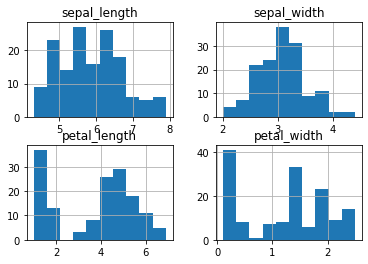

In [36]:
# Visualisation des données avec des histogrammes
dataset.hist()
plt.show()

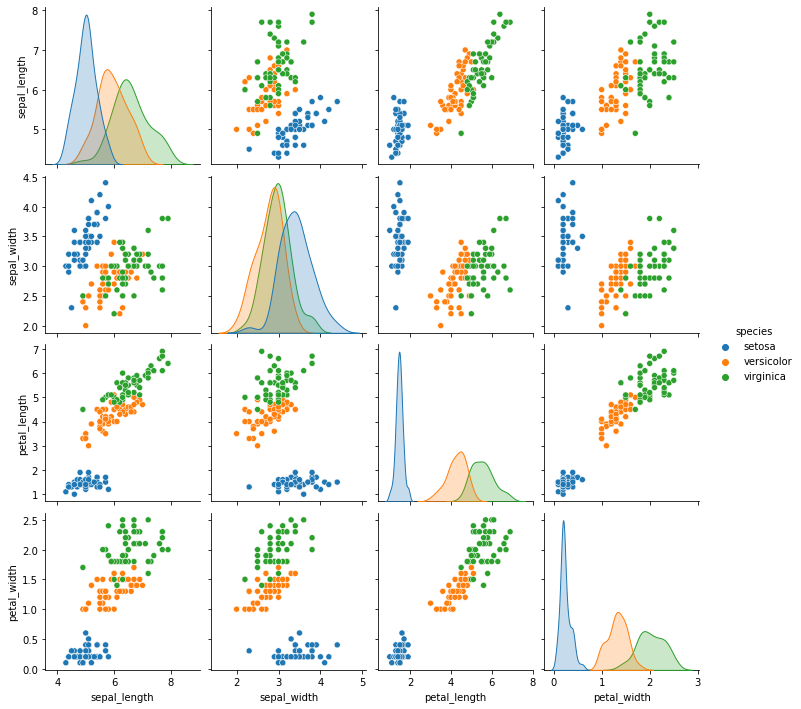

In [37]:
# Visualisation des données avec des plots
import seaborn as sns
sns.pairplot(dataset, hue='species')
plt.show()

In [38]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

# Diviser les données en variables d'entrée (X) et variable cible (y)
X = dataset.drop('species', axis=1)
y = dataset['species']

# Créer un jeu de test (20% des données)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)


In [39]:
models = []
models.append(('Régression logistique',LogisticRegression(multi_class="ovr",solver="lbfgs")))
models.append(('KNN',KNeighborsClassifier(n_neighbors=5)))
models.append(('Arbre de classification et régression',DecisionTreeClassifier()))
models.append(('SVM', SVC(kernel="linear")))
for name, model in models:
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    print(f"{name} prediction:{accuracy:.4f}")

Nom_M_M,meilleur_model = models[0]
Meilleur_score = accuracy_score(y_test,models[0][1].predict(X_test))
for name ,model in models[1:]:
    accuracy =accuracy_score(y_test,model.predict(X_test))
    if accuracy > Meilleur_score:
        Nom_M_M,meilleur_model = name,model
        Meileur_score = accuracy
        
print(f"\nMeilleur modele :{Nom_M_M} avec precision:{Meileur_score:.4f}")


Régression logistique prediction:0.8667
KNN prediction:1.0000
Arbre de classification et régression prediction:0.9667
SVM prediction:1.0000

Meilleur modele :SVM avec precision:1.0000


In [40]:
from sklearn.metrics import accuracy_score

# Entraînement et prédiction pour chaque modèle
models = [LogisticRegression(), KNeighborsClassifier(n_neighbors=3), DecisionTreeClassifier(), SVC()]
model_names = ['Régression logistique', 'KNN', 'Arbre de classification et régression', 'SVM']
best_model = None
best_accuracy = 0.0

for model, name in zip(models, model_names):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Précision de {name} : {accuracy}")
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = model

print(f"Meilleur modèle : {best_model}")
print(f"Précision du meilleur modèle : {best_accuracy}")

Précision de Régression logistique : 0.9666666666666667
Précision de KNN : 1.0
Précision de Arbre de classification et régression : 0.9666666666666667
Précision de SVM : 0.9666666666666667
Meilleur modèle : KNeighborsClassifier(n_neighbors=3)
Précision du meilleur modèle : 1.0


In [41]:
# Entraîner le meilleur modèle sur les données d'entraînement
best_model.fit(X_train, y_train)

# Faire des prédictions sur les données de test
predictions = best_model.predict(X_test)

# Évaluer la précision du modèle en comparant les prédictions aux vérités terrain
accuracy = (predictions == y_test).mean()
print("Précision du meilleur modèle sur les données du jeu de test :", accuracy)


Précision du meilleur modèle sur les données du jeu de test : 1.0
